<a href="https://colab.research.google.com/github/priyankabutun/Data/blob/main/Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
import missingno as msno
#Interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [3]:
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
 $('div.cell.code_cell.rendered.selected div.input').hide();
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" class="btn btn-primary" value="Click here to toggle on/off the raw code."></form>''')

<h3>We are going to use a simple csv file "Playstore.csv", available on Kaggle.
Before getting into actual <i>movie</i>, let's have a look at our main characters :- </h3>

    1) App :- Name of the App
    2) Category :- Category under which the App falls.
    3) Rating :- Application's rating on playstore
    4) Reviews :- Number of reviews of the App.
    5) Size :- Size of the App.
    6) Install :- Number of Installs of the App
    7) Type :- If the App is free/paid
    8) Price :- Price of the app (0 if it is Free)
    9) Content Rating :- Appropiate Target Audience of the App.
    10) Genres:- Genre under which the App falls.
    11) Last Updated :- Date when the App was last updated
    12) Current Ver :- Current Version of the Application
    13) Android Ver :- Minimum Android Version required to run the App

<i>So now we know our characters and a basic plot, lets start our movie with no more delay. </i>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv'
listdata= pd.read_csv(file_path)

In [6]:
display(listdata.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Get  basic information about the dataset
print(listdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [8]:
#Handle missing value (e.g.,filling or dropping)
listdata['Rating'].fillna(listdata['Rating'].mean(), inplace=True)
listdata.dropna(subset=['App', 'Category'], inplace=True)

In [56]:
# Convert scientific notation to simple numbers for better reading
pd.options.display.float_format = '{:.2f}'.format
print(listdata.describe())

# Reset the float format to default
pd.options.display.float_format = None

        Rating     Reviews    Size      Installs    Price  \
count 10357.00    10357.00 8831.00      10357.00 10357.00   
mean      4.19   405904.61   21.29   14157759.44     1.03   
min       1.00        0.00    0.01          0.00     0.00   
25%       4.10       32.00    4.70       1000.00     0.00   
50%       4.20     1680.00   13.00     100000.00     0.00   
75%       4.50    46416.00   29.00    1000000.00     0.00   
max       5.00 78158306.00  100.00 1000000000.00   400.00   
std       0.48  2696777.84   22.54   80239553.87    16.28   

                        Last Updated     Year    Month  
count                          10357 10357.00 10357.00  
mean   2017-11-14 09:25:19.320266496  2017.38     6.40  
min              2010-05-21 00:00:00  2010.00     1.00  
25%              2017-09-03 00:00:00  2017.00     5.00  
50%              2018-05-20 00:00:00  2018.00     7.00  
75%              2018-07-19 00:00:00  2018.00     8.00  
max              2018-08-08 00:00:00  2018.00    12

In [10]:
listdata.duplicated().sum()

np.int64(483)

In [11]:
# Display all duplicated rows
duplicated_rows = listdata[listdata.duplicated()]
display(duplicated_rows)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [12]:
# Delete duplicated rows
listdata.drop_duplicates(inplace=True)

In [13]:
# Display the shape of the Data Frame to confirm removal
print("Shape of the Data Frame after removing duplicates:")
print(listdata.shape)

Shape of the Data Frame after removing duplicates:
(10358, 13)


In [14]:
listdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
listdata['Reviews'] = pd.to_numeric(listdata['Reviews'], errors='coerce')

In [16]:
listdata['Installs'] = listdata['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
listdata['Installs'] = pd.to_numeric(listdata['Installs'], errors='coerce')

In [17]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert kilobytes to megabytes
    else:
        return np.nan # Handle 'Varies with device' and other non-numeric values

listdata['Size'] = listdata['Size'].apply(convert_size)

In [18]:
listdata['Price'] = listdata['Price'].str.replace('$', '', regex=False)
listdata['Price'] = pd.to_numeric(listdata['Price'], errors='coerce')

In [19]:
listdata['Last Updated'] = pd.to_datetime(listdata['Last Updated'], errors='coerce')

In [20]:
# Calculate the number of apps per category
category_counts = listdata['Category'].value_counts()

# Display the counts
display(category_counts)

,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


In [21]:
listdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          10358 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  float64       
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [22]:
categorical_columns = listdata.select_dtypes(include='object').columns.tolist()
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [23]:
categorical_columns = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    display(listdata[col].unique())
    print("\n" + "="*50 + "\n")

Unique values in 'App':


array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)



Unique values in 'Category':


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)



Unique values in 'Type':


array(['Free', 'Paid', nan, '0'], dtype=object)



Unique values in 'Content Rating':


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)



Unique values in 'Genres':


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 



Unique values in 'Current Ver':


array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)



Unique values in 'Android Ver':


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [24]:
print("Unique values in 'Category':")
display(listdata['Category'].unique())

Unique values in 'Category':


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [25]:
# Remove the row with the inconsistent '1.9' category
listdata = listdata[listdata['Category'] != '1.9']

# Verify that '1.9' is removed from the unique values
print("Unique values in 'Category' after removal:")
display(listdata['Category'].unique())

Unique values in 'Category' after removal:


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
print("Unique values in 'Content Rating':")
display(listdata['Content Rating'].unique())

Unique values in 'Content Rating':


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [27]:
print("Unique values in 'Genres':")
display(listdata['Genres'].unique())

Unique values in 'Genres':


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [28]:
# Extract the primary genre before the semicolon
listdata['Genres'] = listdata['Genres'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)

# Display the unique values again to confirm the change
print("Unique values in 'Genres' after splitting:")
display(listdata['Genres'].unique())

Unique values in 'Genres' after splitting:


array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [29]:
normalized_categorical_columns = ['Category', 'Content Rating', 'Genres']

for col in normalized_categorical_columns:
    print(f"Unique values in '{col}':")
    display(listdata[col].unique())
    print("\n" + "="*50 + "\n")

Unique values in 'Category':


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)



Unique values in 'Content Rating':


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)



Unique values in 'Genres':


array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [30]:
print(f"Number of unique values in 'App': {listdata['App'].nunique()}")
print("\nFirst 50 unique values in 'App':")
display(listdata['App'].unique()[:50])

Number of unique values in 'App': 9659

First 50 unique values in 'App':


array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
       'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book',
       'Paper flowers instructions',
       'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter',
       'Garden Coloring Book', 'Kids Paint Free - Drawing Fun',
       'Text on Photo - Fonteee',
       'Name Art Photo Editor - Focus n Filters',
       'Tattoo Name On My Photo Editor', 'Mandala Coloring Book',
       '3D Color Pixel by Number - Sandbox Art Coloring',
       'Learn To Draw Kawaii Characters',
       'Photo Designer - Write your name with shapes',
       '350 Diy Room Decor Ideas', 'FlipaClip - Cartoon animation',
       'ibis Paint X', 'Logo Maker - Small Business',
       "Boys Photo Editor - Six Pack & Men's Suit",
       'Superheroes Wallpapers | 4K Backgrounds',
       'Mcqueen Coloring pages', 'HD Mickey Minnie Wallpapers',
       'Harley 

In [31]:
print("Unique values in 'Type':")
display(listdata['Type'].unique())

Unique values in 'Type':


array(['Free', 'Paid', nan], dtype=object)

In [32]:
print("Unique values in 'Current Ver':")
display(listdata['Current Ver'].unique())

Unique values in 'Current Ver':


array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [33]:
print("Unique values in 'Android Ver':")
display(listdata['Android Ver'].unique())

Unique values in 'Android Ver':


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [34]:
normalized_categorical_columns = ['Category', 'Content Rating', 'Genres', 'Type', 'Android Ver']

for col in normalized_categorical_columns:
    print(f"Unique values in '{col}':")
    display(listdata[col].unique())
    print("\n" + "="*50 + "\n")

Unique values in 'Category':


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)



Unique values in 'Content Rating':


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)



Unique values in 'Genres':


array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)



Unique values in 'Type':


array(['Free', 'Paid', nan], dtype=object)



Unique values in 'Android Ver':


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Rating', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Frequency')

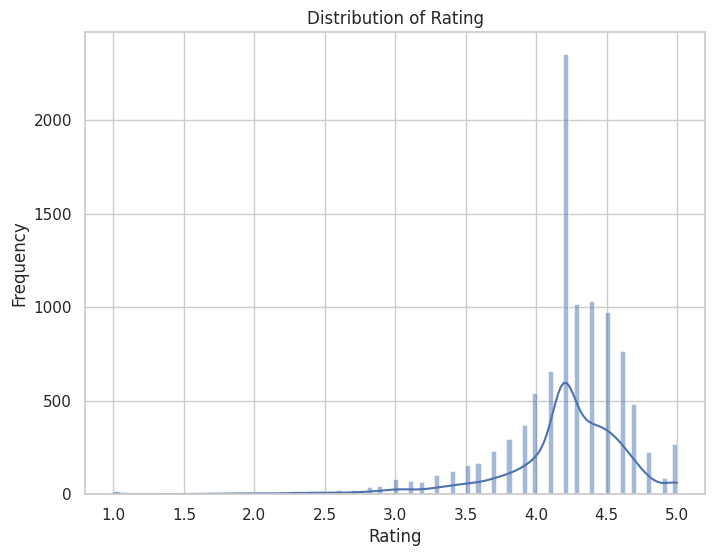

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Reviews', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Reviews')

Text(0.5, 0, 'Reviews')

Text(0, 0.5, 'Frequency')

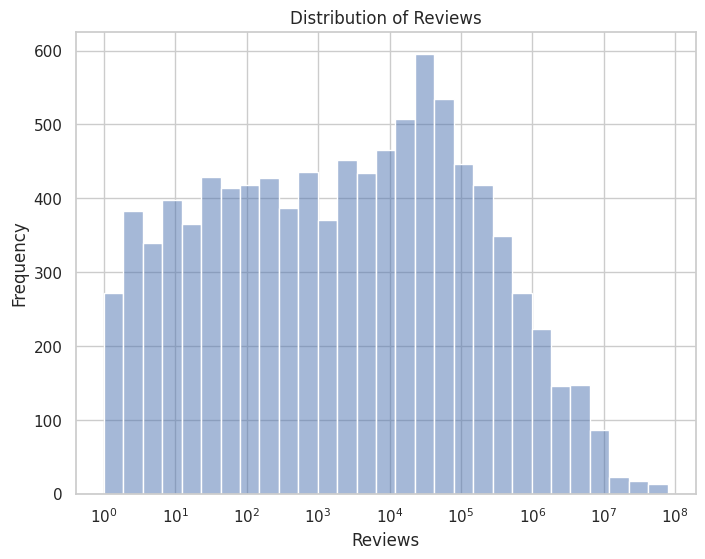

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Size', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Size')

Text(0.5, 0, 'Size')

Text(0, 0.5, 'Frequency')

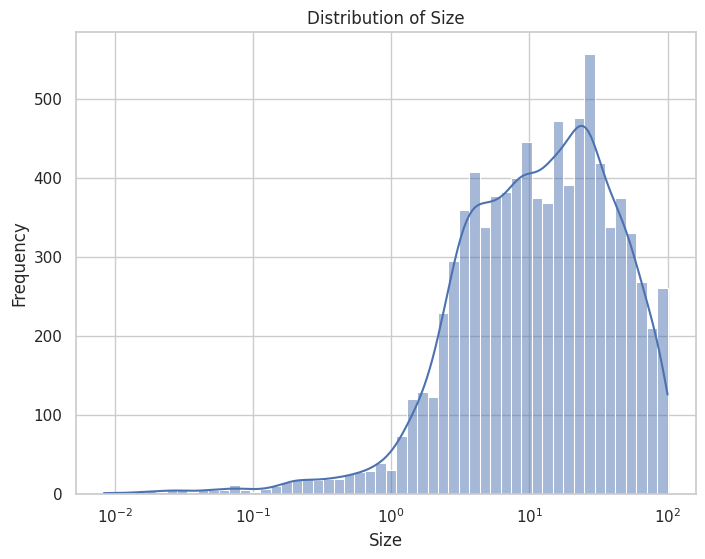

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Installs', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Installs')

Text(0.5, 0, 'Installs')

Text(0, 0.5, 'Frequency')

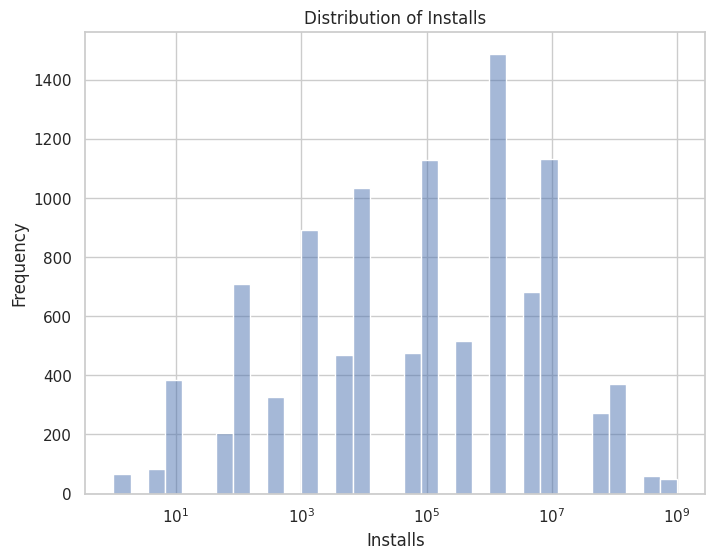

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Price', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Price')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

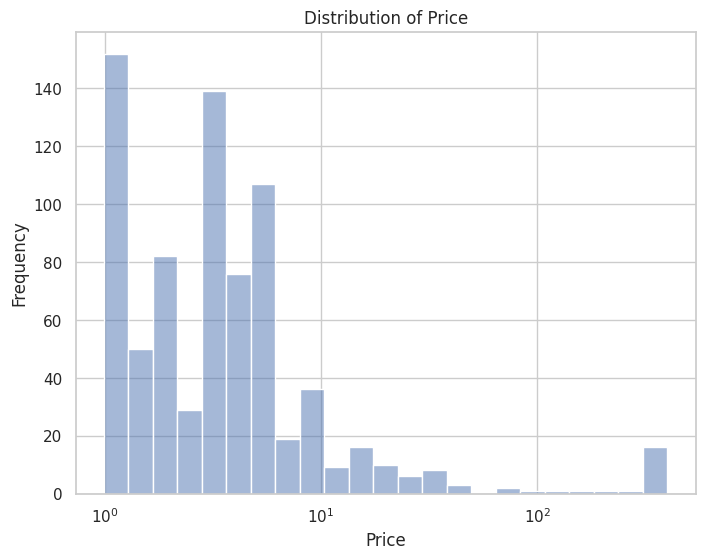

In [35]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    if col in ['Reviews', 'Size', 'Installs', 'Price']:
        sns.histplot(listdata[col].dropna(), kde=True, log_scale=True)
        plt.xscale('log')
    else:
        sns.histplot(listdata[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Rating'>

Text(0.5, 1.0, 'Box Plot of Rating')

Text(0, 0.5, 'Rating')

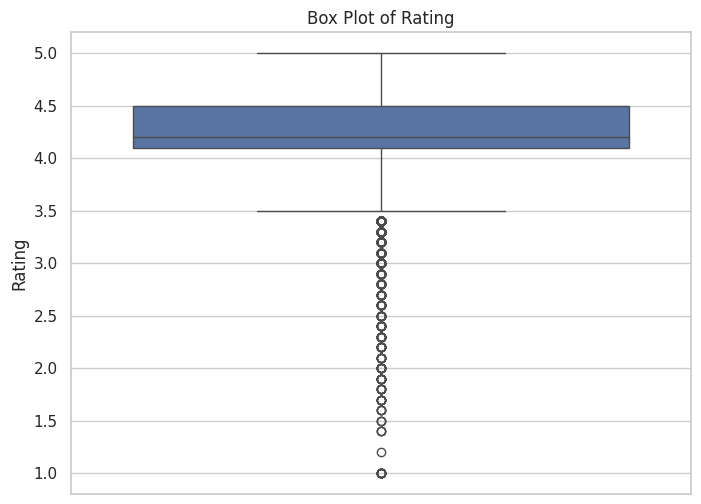

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Reviews'>

Text(0.5, 1.0, 'Box Plot of Reviews')

Text(0, 0.5, 'Reviews')

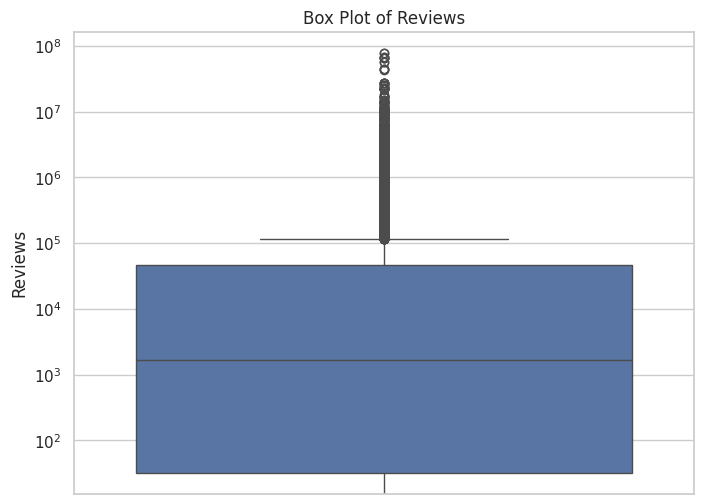

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Size'>

Text(0.5, 1.0, 'Box Plot of Size')

Text(0, 0.5, 'Size')

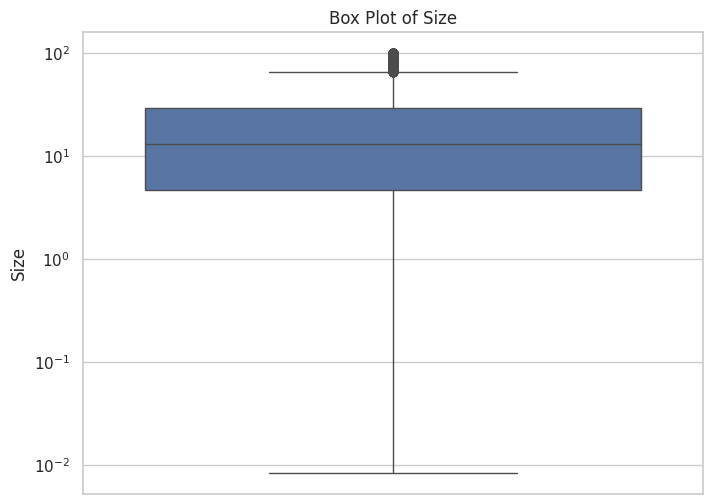

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Installs'>

Text(0.5, 1.0, 'Box Plot of Installs')

Text(0, 0.5, 'Installs')

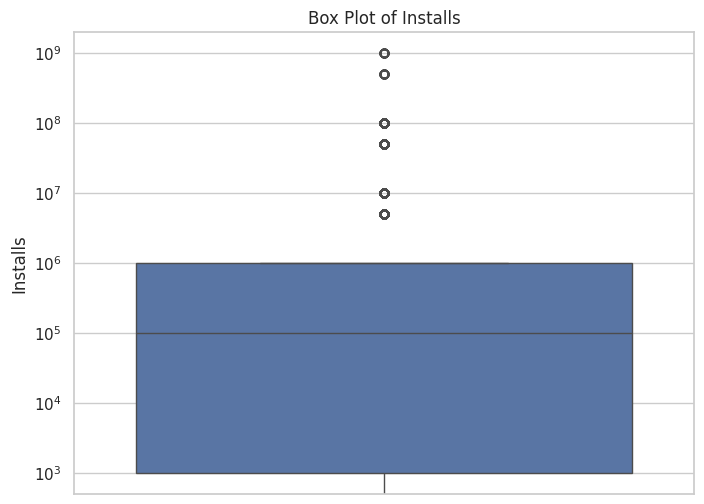

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Price'>

Text(0.5, 1.0, 'Box Plot of Price')

Text(0, 0.5, 'Price')

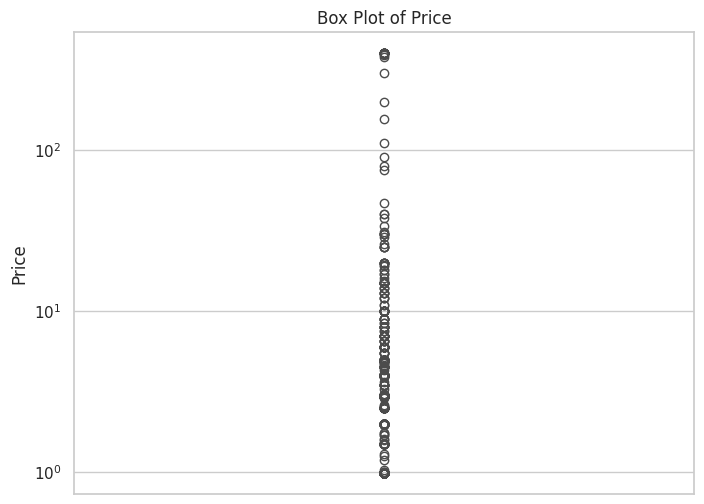

In [36]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    if col in ['Reviews', 'Size', 'Installs', 'Price']:
        sns.boxplot(y=listdata[col].dropna())
        plt.yscale('log')
    else:
        sns.boxplot(y=listdata[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='count', ylabel='Category'>

Text(0.5, 1.0, 'Distribution of Apps by Category')

Text(0.5, 0, 'Number of Apps')

Text(0, 0.5, 'Category')

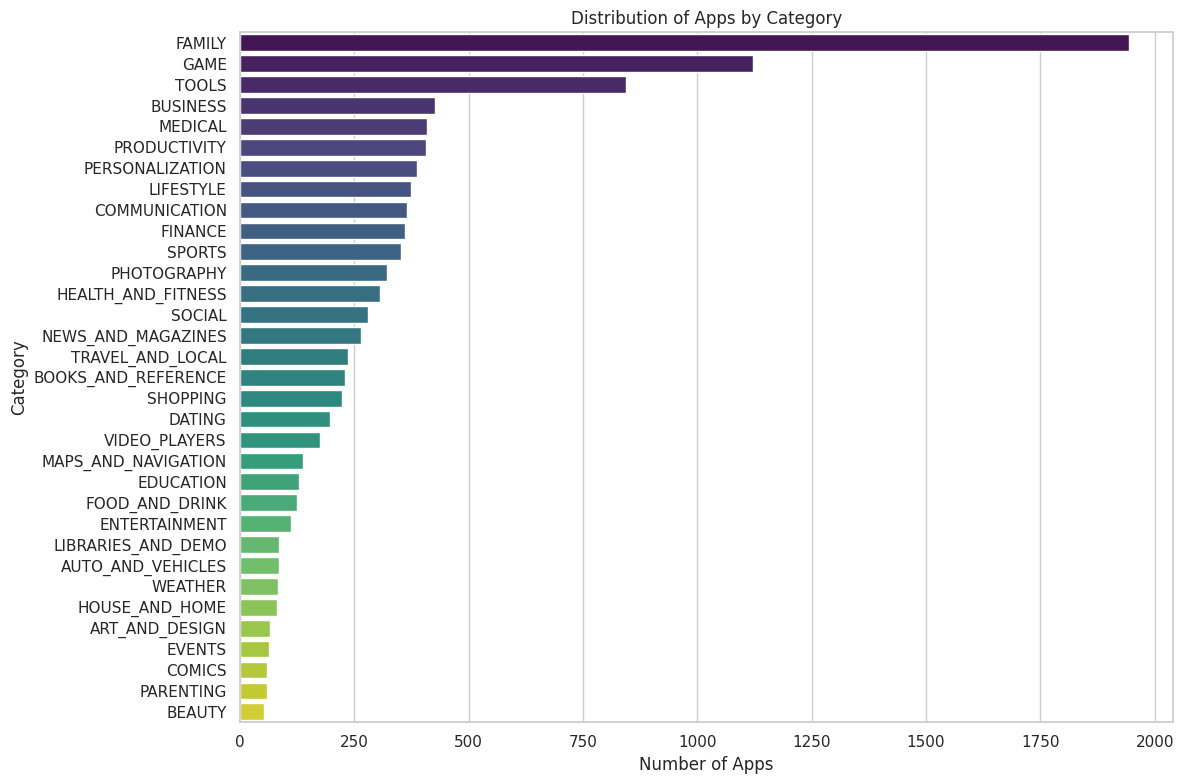

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Content Rating', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Apps by Content Rating')

Text(0.5, 0, 'Content Rating')

Text(0, 0.5, 'Number of Apps')

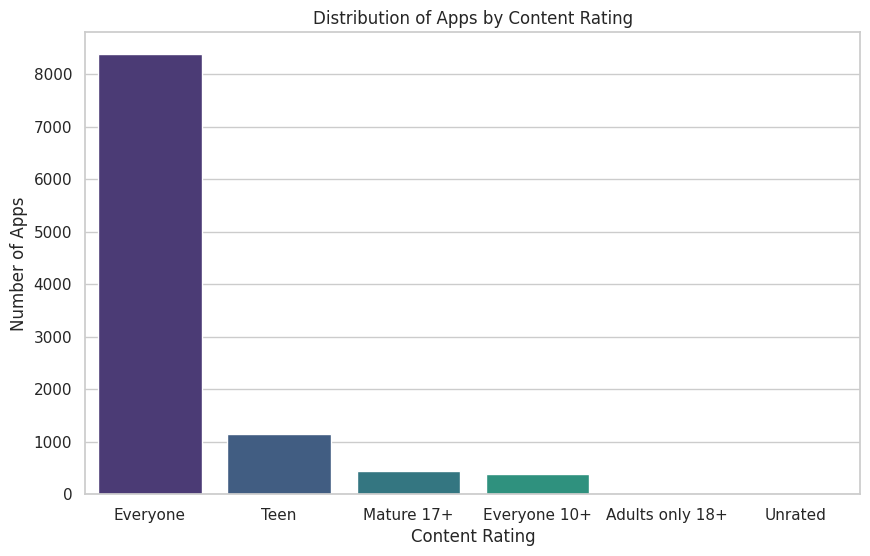

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Type', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Apps by Type')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Number of Apps')

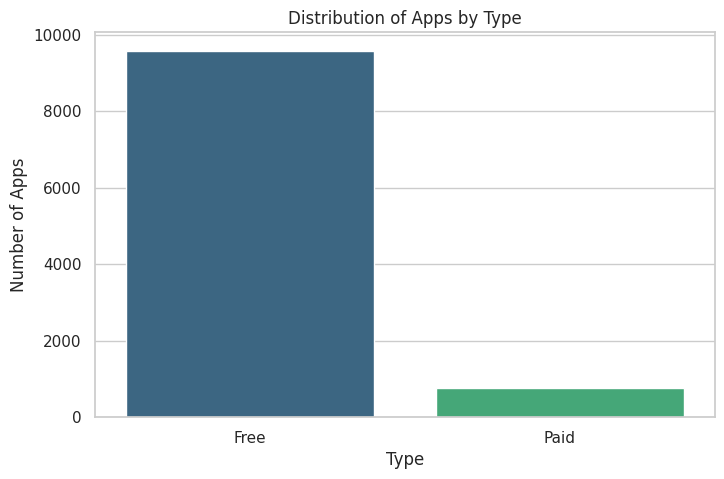

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=listdata, y='Category', order=listdata['Category'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=listdata, x='Content Rating', order=listdata['Content Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=listdata, x='Type', order=listdata['Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Apps by Type')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.show()

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='Category', ylabel='Rating'>

Text(0.5, 1.0, 'Distribution of Rating by Category')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

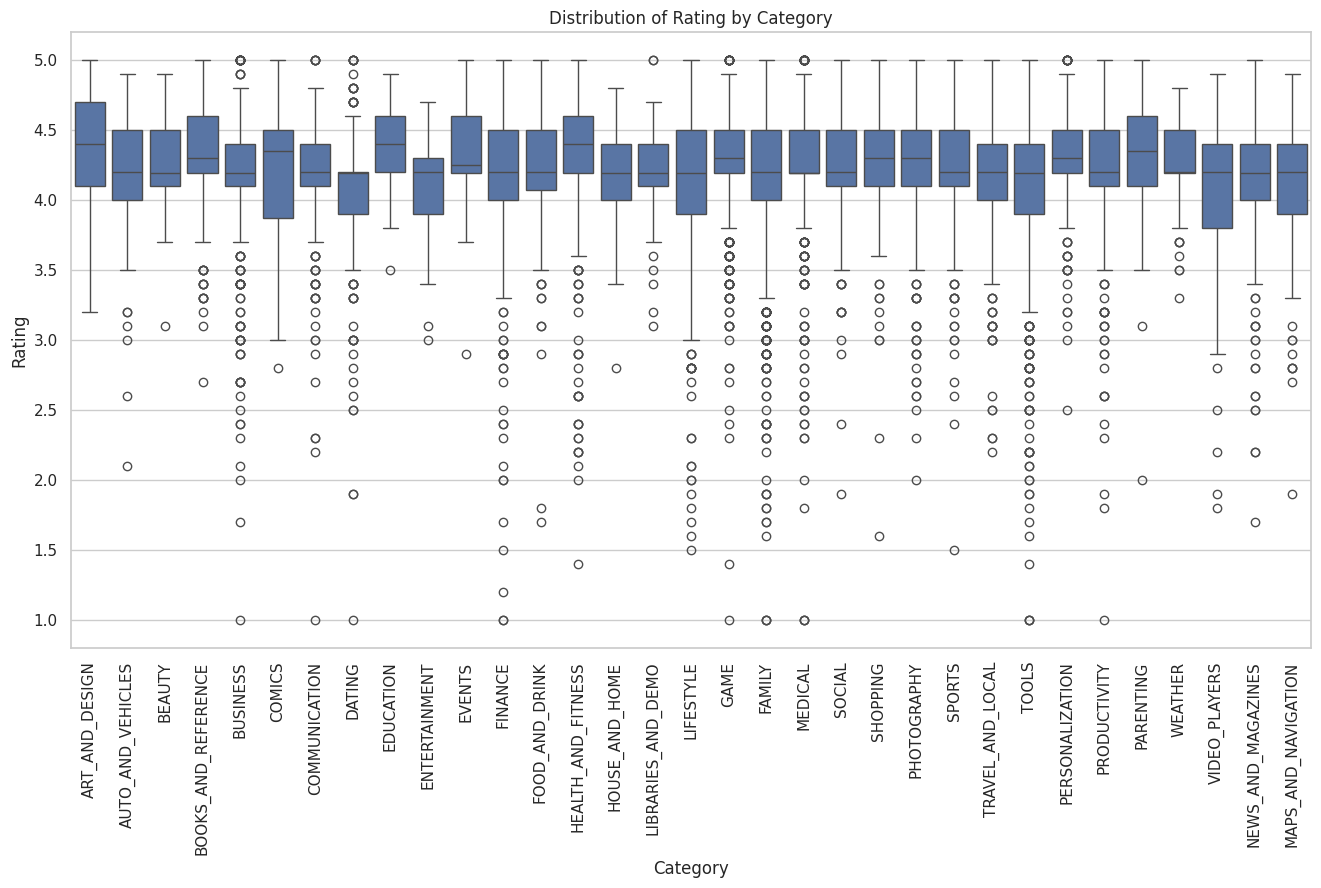

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Content Rating', ylabel='Rating'>

Text(0.5, 1.0, 'Distribution of Rating by Content Rating')

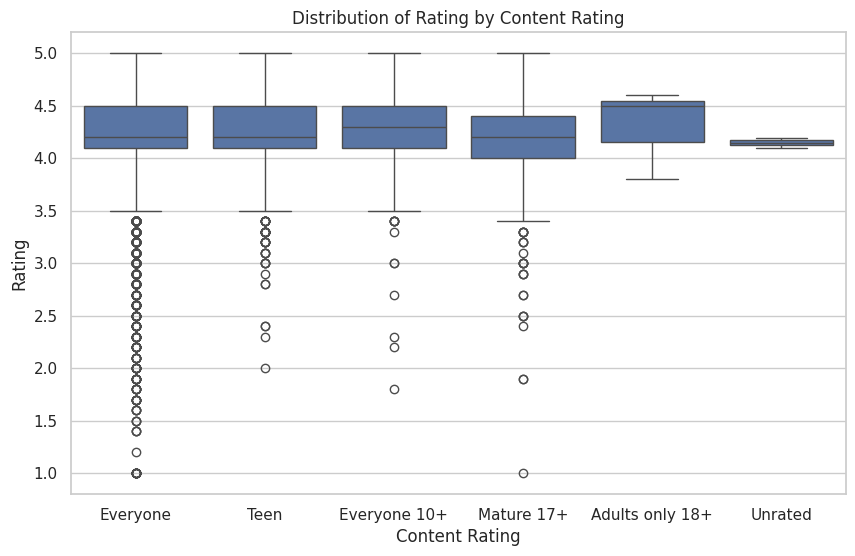

,Installs
Content Rating,
Everyone 10+,2.968507e+07
Teen,2.697930e+07
Everyone,1.195772e+07
Mature 17+,9.598874e+06
Adults only 18+,6.666667e+05
Unrated,2.525000e+04


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Content Rating'>

Text(0.5, 1.0, 'Average Installs by Content Rating')

Text(0.5, 0, 'Content Rating')

Text(0, 0.5, 'Average Installs')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone 10+'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

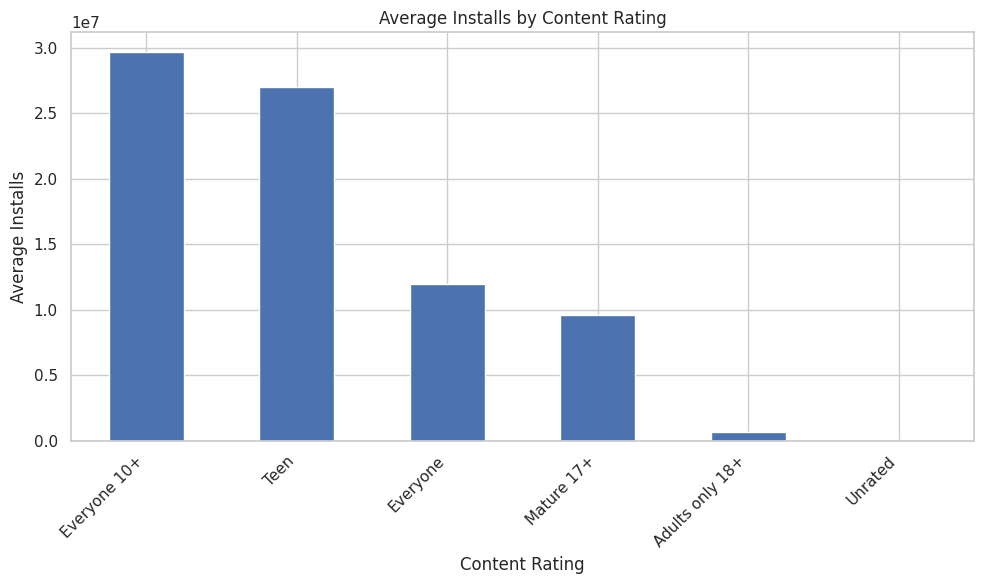

In [39]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Category', y='Rating', data=listdata)
plt.title('Distribution of Rating by Category')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Rating', y='Rating', data=listdata)
plt.title('Distribution of Rating by Content Rating')
plt.show()

average_installs_by_content_rating = listdata.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)
display(average_installs_by_content_rating)

plt.figure(figsize=(10, 6))
average_installs_by_content_rating.plot(kind='bar')
plt.title('Average Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Calculate total installs per category and get the top 10
category_installs = listdata.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Calculate average rating per app and get the top 10
app_ratings = listdata.groupby('App')['Rating'].mean().sort_values(ascending=False).head(10)

**Reasoning**:
Create bar plots to visualize the top 10 categories by total installs and the top 10 apps by average rating.



<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Top 10 Categories by Total Installs')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Installs')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'SOCIAL'),
  Text(3, 0, 'PRODUCTIVITY'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'FAMILY'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'TRAVEL_AND_LOCAL'),
  Text(8, 0, 'VIDEO_PLAYERS'),
  Text(9, 0, 'NEWS_AND_MAGAZINES')])

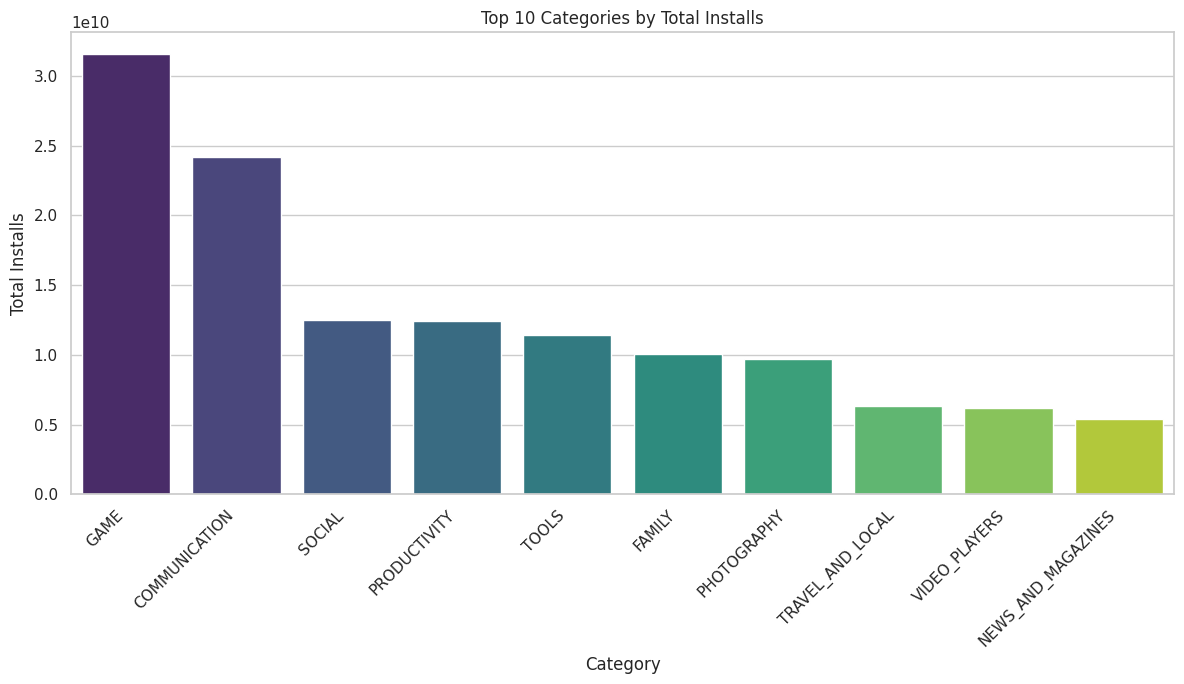

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='App'>

Text(0.5, 1.0, 'Top 10 Apps by Average Rating')

Text(0.5, 0, 'App')

Text(0, 0.5, 'Average Rating')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'South Florida AA Meetings'),
  Text(1, 0, 'Bar-B-Q Rib House'),
  Text(2, 0, 'Barbers.BH'),
  Text(3, 0, 'Trinity Church Deltona, FL'),
  Text(4, 0, 'FA Player Essentials'),
  Text(5, 0, 'FAST EO'),
  Text(6, 0, 'Tic Tac CK'),
  Text(7, 0, 'Ríos de Fe'),
  Text(8, 0, 'Barisal University App-BU Face'),
  Text(9, 0, 'Basics of Orthopaedics')])

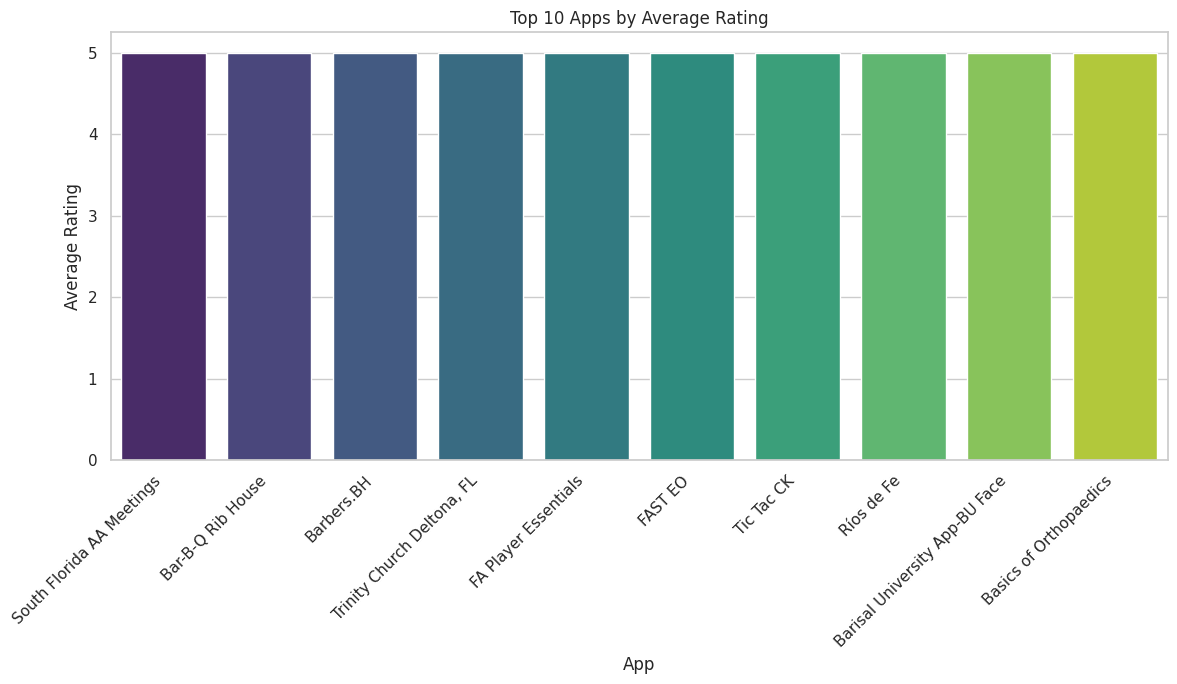

In [41]:
# Plot the top 10 categories by total installs
plt.figure(figsize=(12, 7))
sns.barplot(x=category_installs.index, y=category_installs.values, palette='viridis')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the top 10 apps by average rating
plt.figure(figsize=(12, 7))
sns.barplot(x=app_ratings.index, y=app_ratings.values, palette='viridis')
plt.title('Top 10 Apps by Average Rating')
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
listdata['Year'] = listdata['Last Updated'].dt.year
listdata['Month'] = listdata['Last Updated'].dt.month

updates_by_year = listdata.groupby('Year').size()
updates_by_month = listdata.groupby('Month').size()

print("Number of apps updated by year:")
display(updates_by_year)

print("\nNumber of apps updated by month:")
display(updates_by_month)

Number of apps updated by year:


,0
Year,
2010,1
2011,15
2012,26
2013,108
2014,204
2015,454
2016,789
2017,1826
2018,6934



Number of apps updated by month:


,0
Month,
1,480
2,527
3,656
4,600
5,962
6,1226
7,2950
8,1466
9,308


<Figure size 1200x300 with 0 Axes>

<Axes: xlabel='Year'>

Text(0.5, 1.0, 'Number of Apps Updated Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Apps Updated')

([<matplotlib.axis.XTick at 0x787520feb230>,
 [Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018')])

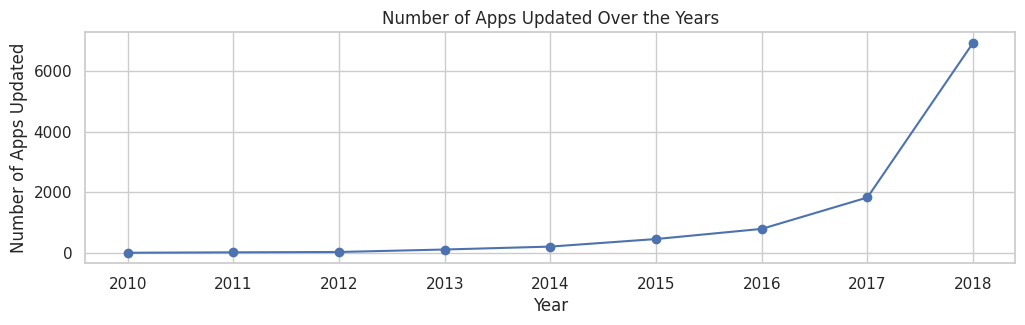

<Figure size 1200x300 with 0 Axes>

<Axes: xlabel='Month'>

Text(0.5, 1.0, 'Number of Apps Updated Per Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Apps Updated')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

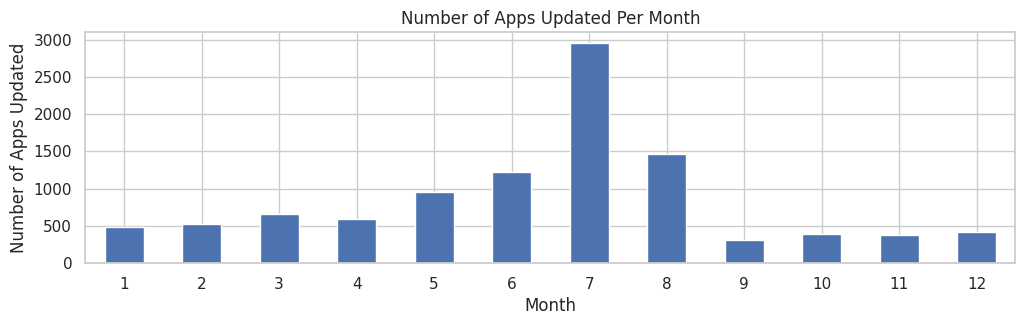

In [43]:
plt.figure(figsize=(12, 3))
updates_by_year.plot(kind='line', marker='o')
plt.title('Number of Apps Updated Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Apps Updated')
plt.xticks(updates_by_year.index)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 3))
updates_by_month.plot(kind='bar')
plt.title('Number of Apps Updated Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Apps Updated')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Installs', ylabel='Rating'>

Text(0.5, 1.0, 'Scatter Plot of Installs vs. Rating')

Text(0.5, 0, 'Installs')

Text(0, 0.5, 'Rating')

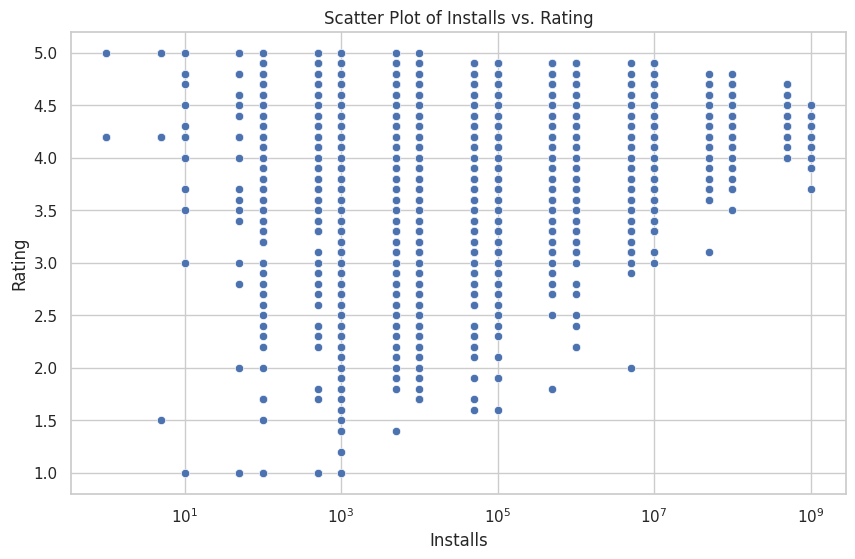

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=listdata)
plt.title('Scatter Plot of Installs vs. Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.xscale('log') # Use log scale for 'Installs' due to its skewed distribution
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Price', ylabel='Rating'>

Text(0.5, 1.0, 'Scatter Plot of Price vs. Rating for Paid Apps')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Rating')

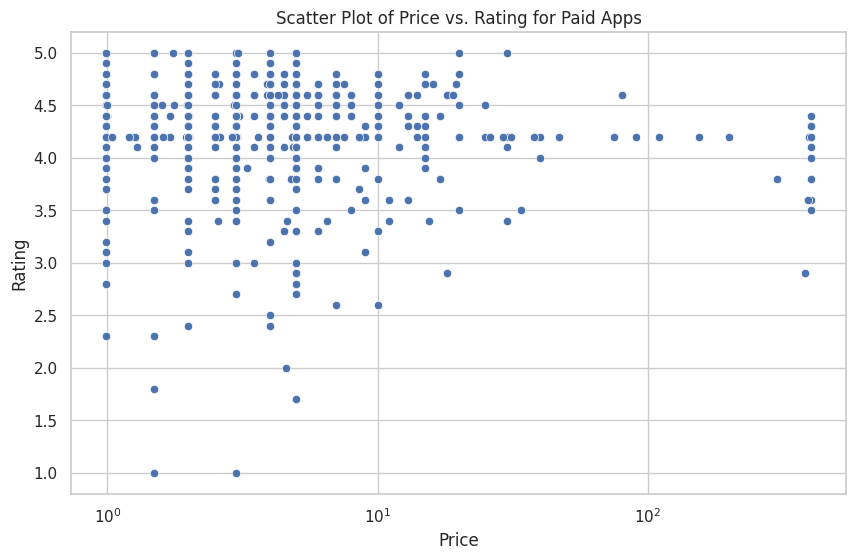

In [45]:
paid_apps = listdata[listdata['Type'] == 'Paid']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Scatter Plot of Price vs. Rating for Paid Apps')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.xscale('log')  # Use log scale for price as it can vary widely
plt.show()

In [46]:
grouped_by_type = listdata.groupby('Type')

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Type', ylabel='Installs'>

Text(0.5, 1.0, 'Average Installs by App Type')

Text(0.5, 0, 'App Type')

Text(0, 0.5, 'Average Installs')

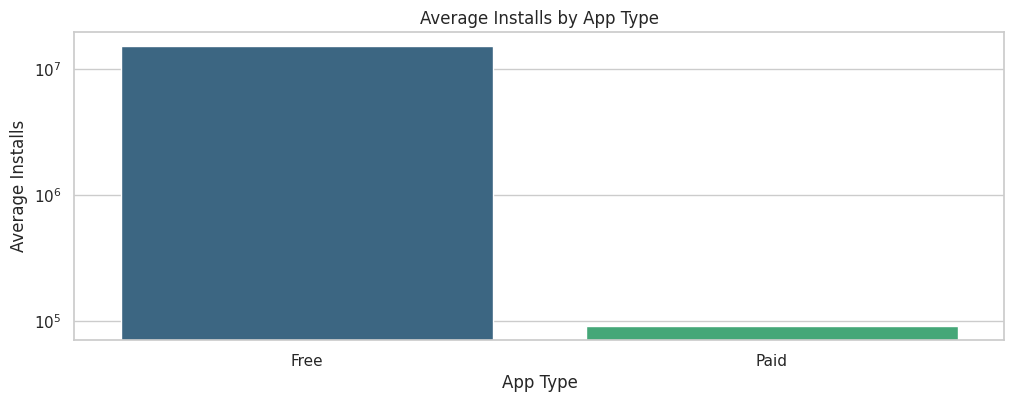

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Type', ylabel='Reviews'>

Text(0.5, 1.0, 'Average Reviews by App Type')

Text(0.5, 0, 'App Type')

Text(0, 0.5, 'Average Reviews')

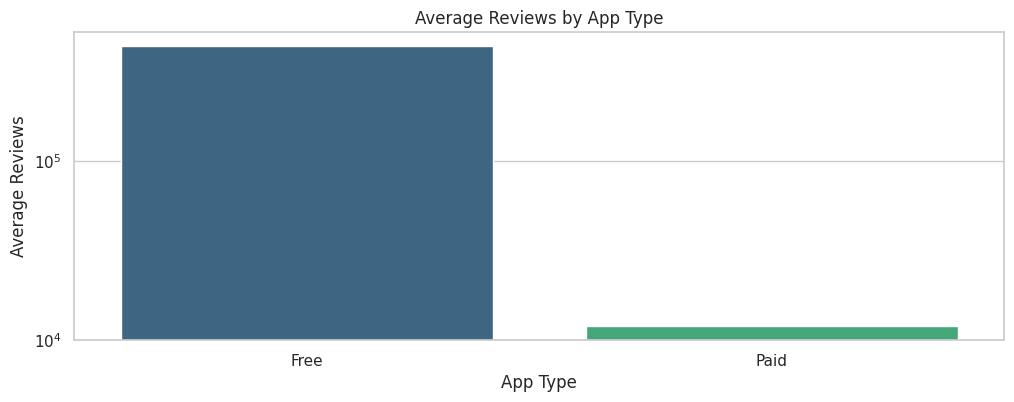

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Type', ylabel='Rating'>

Text(0.5, 1.0, 'Average Rating by App Type')

Text(0.5, 0, 'App Type')

Text(0, 0.5, 'Average Rating')

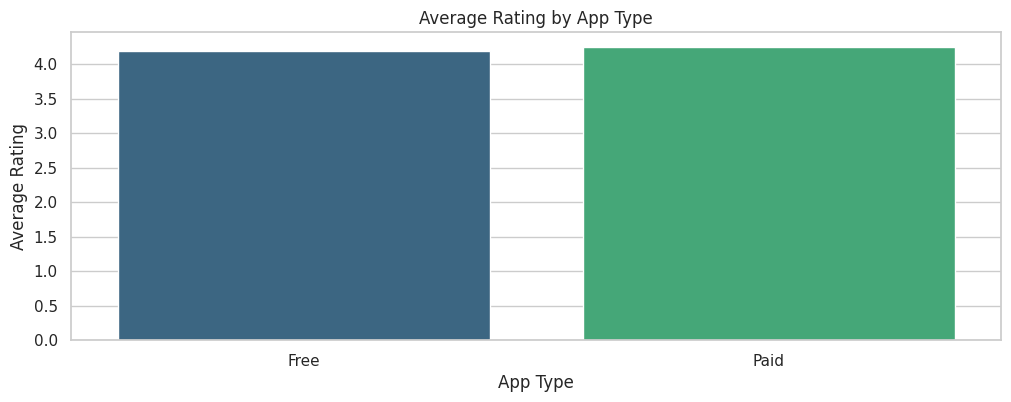

In [54]:
metrics_to_plot = ['Installs', 'Reviews', 'Rating']

# Calculate the mean metrics by app type
mean_metrics_by_type = listdata.groupby('Type')[metrics_to_plot].mean()


for metric in metrics_to_plot:
    plt.figure(figsize=(12, 4))
    sns.barplot(x=mean_metrics_by_type.index, y=mean_metrics_by_type[metric], palette='viridis')
    plt.title(f'Average {metric} by App Type')
    plt.xlabel('App Type')
    plt.ylabel(f'Average {metric}')
    if metric in ['Installs', 'Reviews']:
        plt.yscale('log')
    plt.show()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Numeric Columns')

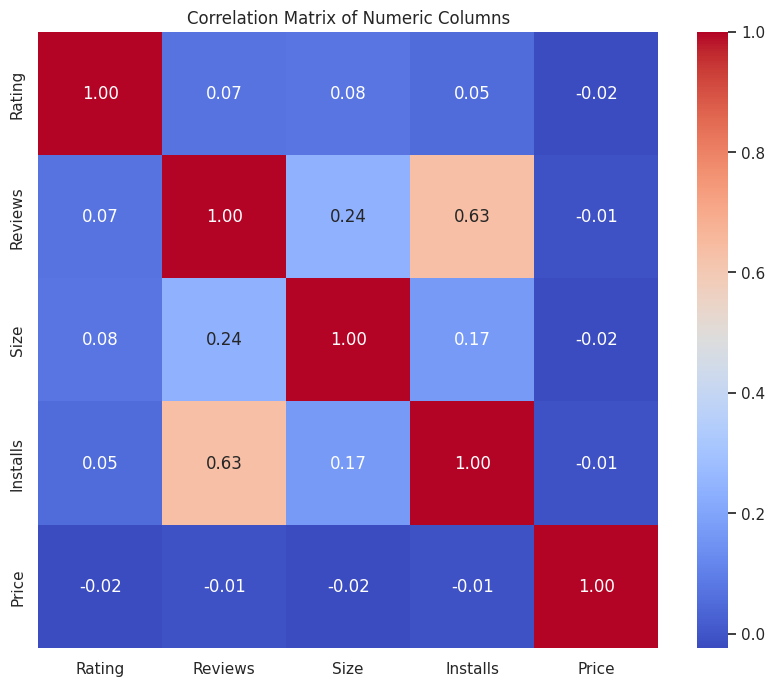

In [50]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
correlation_matrix = listdata[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()